# pyWavelet Snow Radar Processor

In [12]:
import os
import matfunc
import picklayers
import calcpulse
import qc
import plotradar
import numpy as np
import matplotlib.pyplot as plt

In [13]:
density_snow = 0.300 #Density of snow on sea ice; See Alexandrov et al., 2010, The Cryosphere
perm_snow = (1+0.51*density_snow)**3  #Density to permitivity
n_snow = np.sqrt(perm_snow) #Permitivity to refractive index
c = 299792458 #Vacuum speed of light

In [14]:
radar_file = os.path.abspath("C:/Users/kingj/Documents/Projects/2018-2019/250618_Wavelet/pyWavelet/pyWavelet/data/Data_20160419_04_010.mat")
radar_dat =  matfunc.loadmat(radar_file)

In [ ]:
fig, ax = plt.subplots()
ax.plot(data_col_log)
ax.vlines([locs_as, locs_si], 0, 1, transform=ax.get_xaxis_transform(), colors='r')
plt.show()

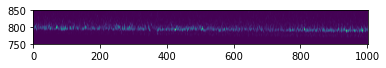

In [27]:
fig, ax = plt.subplots()
ax.imshow(radar_dat['Data'], interpolation='nearest')
#ax1.set_xlim([0, 5])
ax.set_ylim([750, 850])
plt.show()
#grid(True)

In [8]:
qc.noisepower(radar_dat,600)
#np.apply_along_axis(np.median,0,radar_dat['Data'][1:100,:])

[[0.02087604 0.01649947 0.01048583 ... 0.00948886 0.01296728 0.0261961 ]
 [0.0210457  0.01942018 0.01157568 ... 0.00976365 0.01677434 0.02534186]
 [0.02209985 0.02305795 0.01330557 ... 0.00947991 0.02218463 0.02237371]
 ...
 [0.98463964 0.6385807  1.5502341  ... 0.31323653 0.5780497  0.3297311 ]
 [1.1448963  0.63961184 1.4883571  ... 0.287524   0.550763   0.36324796]
 [1.2590294  0.6005918  1.3664529  ... 0.29961088 0.49793887 0.38409263]]


In [9]:
bandwidth = np.abs((radar_dat['param_records']['radar']['wfs']['f1']
                    -radar_dat['param_records']['radar']['wfs']['f0'])
                   *radar_dat['param_records']['radar']['wfs']['fmult'])

delta_fast_time = radar_dat['Time'][1] - radar_dat['Time'][0] 
delta_fast_time_range = (delta_fast_time/2)*c

In [10]:
epw, n2n = calcpulse.calcpulsewidth(bandwidth, 'hann')
range_res = epw/2
range_res_snow = range_res/n_snow

### This applies the picklayer function to every trace

In [11]:
l_as,l_si = np.apply_along_axis(picklayers.picklayers, 0, radar_dat['Data'],n2n,delta_fast_time_range,n_snow)

0.28251865766498313


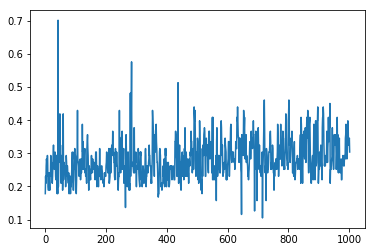

In [9]:
snow_depth = (l_si-l_as)*delta_fast_time_range/n_snow
print(np.mean(snow_depth)) #in m
plt.plot(snow_depth)